En esta sección, aprenderás a crear **gráficos de dispersión** avanzados.

# Configurar el notebook

Como siempre, comenzamos configurando el entorno de programación.

In [1]:

import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


# Cargar y examinar los datos

Trabajaremos con un conjunto de datos (_sintético_) sobre cargos de seguros, para ver si podemos entender por qué algunos clientes pagan más que otros.

![tut3_insurance](https://storage.googleapis.com/kaggle-media/learn/images/1nmy2YO.png)

Si quieres, puedes leer más sobre el conjunto de datos [aquí](https://www.kaggle.com/mirichoi0218/insurance/home).


In [2]:
# Path of the file to read
insurance_filepath = "/content/insurance.csv"

# Read the file into a variable insurance_data
insurance_data = pd.read_csv(insurance_filepath)

Como siempre, verificamos que el conjunto de datos se haya cargado correctamente imprimiendo las primeras cinco filas.


In [3]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Gráficos de dispersión

Para crear un **gráfico de dispersión** simple, usamos el comando `sns.scatterplot` y especificamos los valores para:  
- el eje horizontal x (`x=insurance_data['bmi']`), y  
- el eje vertical y (`y=insurance_data['charges']`).


<Axes: xlabel='bmi', ylabel='charges'>

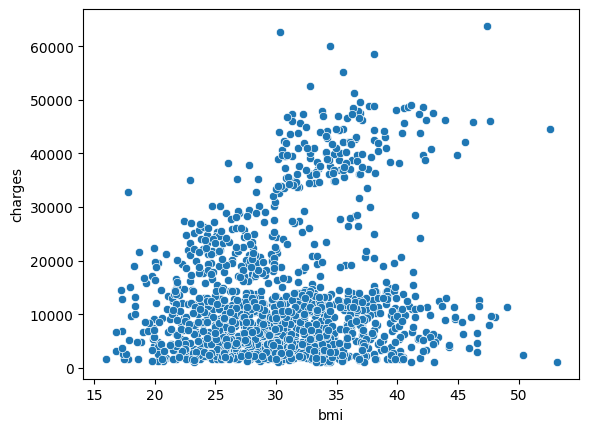

In [4]:
sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges'])

El gráfico de dispersión anterior sugiere que el [índice de masa corporal](https://es.wikipedia.org/wiki/Índice_de_masa_corporal) (IMC) y los cargos del seguro están **positivamente correlacionados**, donde los clientes con un IMC más alto tienden a pagar más en costos de seguro. (_Este patrón tiene sentido, ya que un IMC alto suele estar asociado con un mayor riesgo de enfermedades crónicas._)

Para verificar la fuerza de esta relación, puede que quieras agregar una **línea de regresión**, es decir, la línea que mejor se ajusta a los datos. Hacemos esto cambiando el comando a `sns.regplot`.



<Axes: xlabel='bmi', ylabel='charges'>

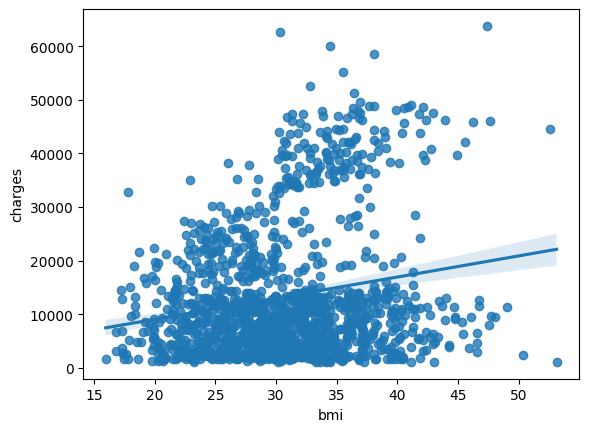

In [5]:
sns.regplot(x=insurance_data['bmi'], y=insurance_data['charges'])

# Gráficos de dispersión codificados por color

Podemos usar gráficos de dispersión para mostrar las relaciones entre (_no dos, sino..._) tres variables. ¡Una forma de hacerlo es codificando los puntos por color!

Por ejemplo, para entender cómo afecta el hábito de fumar a la relación entre el IMC y los costos del seguro, podemos codificar los puntos por la variable `'smoker'` y graficar las otras dos columnas (`'bmi'`, `'charges'`) en los ejes.


<AxesSubplot:xlabel='bmi', ylabel='charges'>

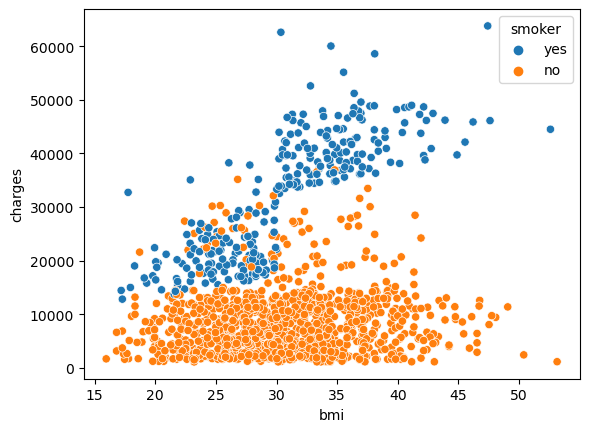

In [ ]:
sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges'], hue=insurance_data['smoker'])

Este gráfico de dispersión muestra que, aunque los no fumadores tienden a pagar un poco más a medida que aumenta el IMC, los fumadores pagan MUCHO más.

Para enfatizar aún más este hecho, podemos usar el comando `sns.lmplot` para agregar dos líneas de regresión, correspondientes a fumadores y no fumadores.  
(_Notarás que la línea de regresión para los fumadores tiene una pendiente mucho más pronunciada en comparación con la línea de los no fumadores._)


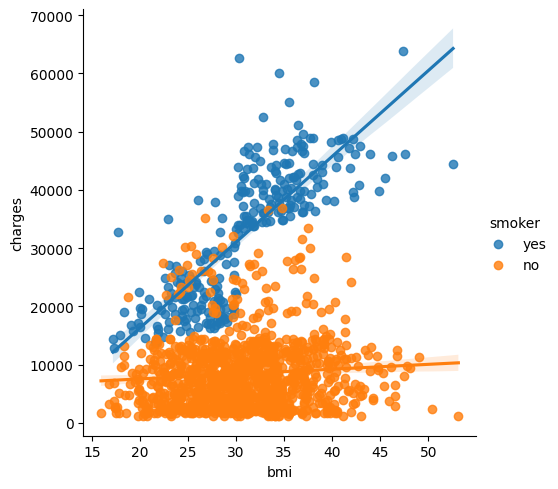

In [6]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=insurance_data)

El comando `sns.lmplot` anterior funciona de forma ligeramente diferente a los comandos que has aprendido hasta ahora:  
- En lugar de usar `x=insurance_data['bmi']` para seleccionar la columna `'bmi'` dentro de `insurance_data`, usamos `x="bmi"` para especificar únicamente el nombre de la columna.  
- De manera similar, `y="charges"` y `hue="smoker"` también contienen únicamente los nombres de las columnas.  
- Especificamos el conjunto de datos con `data=insurance_data`.

Por último, hay un tipo más de gráfico que aprenderás, y que puede verse un poco diferente de lo que estás acostumbrado en los gráficos de dispersión. Usualmente, usamos gráficos de dispersión para destacar la relación entre dos variables continuas (como `"bmi"` y `"charges"`). Sin embargo, podemos adaptar el diseño del gráfico de dispersión para incluir una variable categórica (como `"smoker"`) en uno de los ejes principales. A este tipo de gráfico lo llamaremos **gráfico de dispersión categórico**, y lo construimos con el comando `sns.swarmplot`.


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 37.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='smoker', ylabel='charges'>

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 60.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


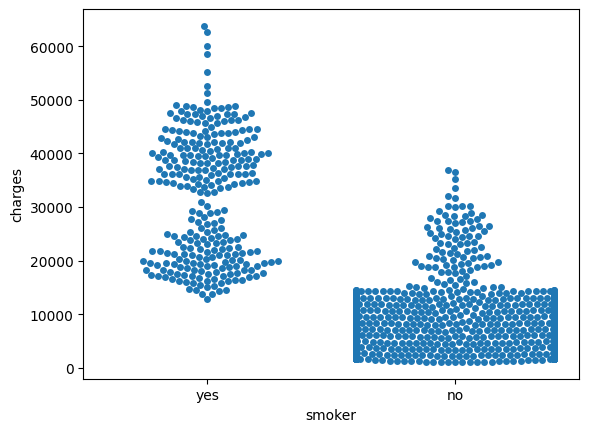

In [7]:
sns.swarmplot(x=insurance_data['smoker'],
              y=insurance_data['charges'])

Entre otras cosas, este gráfico nos muestra que:  
- en promedio, a los no fumadores se les cobra menos que a los fumadores, y  
- los clientes que pagan más son fumadores; mientras que los que pagan menos son no fumadores.
